# Hands on
Social Media Assignment 1

Nima Afshar

9713004

In [1]:
#run this cell to make text-cells rtl
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render{
direction:rtl;
}
</style>
""")

In [222]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,balanced_accuracy_score
import scipy

In [162]:
train_data = pd.read_csv('data/airline-train.csv')

In [163]:
validation_data = pd.read_csv('data/airline-dev.csv')
test_data = pd.read_csv('data/airline-test.csv')

train_data.rename(columns={'Unnamed: 0':'key'},inplace=True)
validation_data.rename(columns={'Unnamed: 0':'key'},inplace=True)
test_data.rename(columns={'Unnamed: 0':'key'},inplace=True)

In [165]:
train_data.set_index('key',inplace=True)
validation_data.set_index('key',inplace=True)
test_data.set_index('key',inplace=True)

In [166]:
train_index = train_data.index
validation_index = validation_data.index
test_index = test_data.index

در این قمست همه‌ی داده‌ها را برای مراحل پیش‌پردازش با هم ترکیب می‌کنیم و بعدا آنها را بر اساس index جدا می‌کنیم. 

In [172]:
train_data = pd.concat([train_data,validation_data,test_data])

# EDA

In [173]:
train_data.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
key,,,,,,,,,,,,,,,,,,,,
11429,681462729,False,finalized,3,2/25/15 3:07,positive,1.0,NaN,NaN,US Airways,NaN,CaraModisett,NaN,0,@USAirways she also appreciated having her ver...,NaN,2/18/15 10:55,5.681220e+17,"Memphis, Tennessee",Central Time (US & Canada)
9717,681461003,False,finalized,3,2/25/15 3:20,negative,1.0,Can't Tell,0.3464,US Airways,NaN,LarrySandeen,NaN,0,@USAirways Just discovered that they billed us...,"[0.0, 0.0]",2/22/15 19:24,5.696990e+17,Southeastern Pennsylvania USA,NaN
10153,681461443,False,finalized,3,2/25/15 6:20,negative,1.0,Can't Tell,1.0000,US Airways,NaN,burseka,NaN,0,@USAirways u guys suck,NaN,2/22/15 7:28,5.695190e+17,NaN,NaN
975,681449647,False,finalized,3,2/25/15 2:14,negative,1.0,Can't Tell,1.0000,United,NaN,artistanxiety,NaN,0,@united I will but right now I'm to angry,NaN,2/23/15 14:09,5.699820e+17,Punk is the preacher.,Arizona
1511,681450373,False,finalized,3,2/25/15 6:57,negative,1.0,Can't Tell,0.6848,United,NaN,axelrodaj,NaN,0,@united not sure why the people in row 7 that ...,"[33.94077727, -118.39921036]",2/22/15 18:50,5.696910e+17,San Francisco,Pacific Time (US & Canada)


In [174]:
train_data.describe()

,_unit_id,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count,tweet_id
count,2.049600e+04,20496.000000,20496.000000,14736.000000,20496.000000,2.049600e+04
mean,6.814952e+08,3.597092,0.899630,0.635575,0.084846,5.692145e+17
std,8.467017e+04,11.653957,0.163227,0.331761,0.762485,7.796501e+14
min,6.814482e+08,2.000000,0.335000,0.000000,0.000000,5.675880e+17
25%,6.814536e+08,3.000000,0.691900,0.360000,0.000000,5.685520e+17
50%,6.814578e+08,3.000000,1.000000,0.670300,0.000000,5.694630e+17
75%,6.814622e+08,3.000000,1.000000,1.000000,0.000000,5.698900e+17
max,6.816798e+08,248.000000,1.000000,1.000000,44.000000,5.703110e+17


In [8]:
profile = ProfileReport(train_data,title="Pandas Profiling Report")

In [27]:
#saving pandas profiling report to html
profile.to_file("report.html")

می‌توانید pandas profiling را داخل فایل report.html مشاهده کنید.

# Data Preprocessing
نکته‌ی عجیبی که درباره‌ی دیتاست وجود دارد این است که تعداد `tweet_id` ها کمتر از تعداد توییت‌هاست و با بررسی  بیشتر دیدیم که توییت‌های یکسانی هم نیستند و فقط این ستون اشتباه اندازه‌گیری شده پس آن را دور می‌ریزیم.
چون `text`ها متفاوت است.

In [175]:
a = train_data['tweet_id'][0]
train_data[train_data['tweet_id'] == a].text

key
12053    @AmericanAir 1hr 46 min. Cost of flight change...
0                      @VirginAmerica What @dhepburn said.
4329     @SouthwestAir I'm teaching new #travelers how ...
12052    @AmericanAir is the new 9:45 time confirmed or...
11891    @AmericanAir is the new 9:45 time confirmed or...
509      @united Your ERI-ORD express connections are h...
11893    @AmericanAir it's not just frustrating--it was...
510      @united even on international flight Glasgow t...
11892    @AmericanAir 1hr 46 min. Cost of flight change...
4330     @SouthwestAir Very frustrated for the loooooon...
12054    @AmericanAir it's not just frustrating--it was...
11892    @AmericanAir 1hr 46 min. Cost of flight change...
4330     @SouthwestAir Very frustrated for the loooooon...
12054    @AmericanAir it's not just frustrating--it was...
Name: text, dtype: object

In [176]:
train_data.drop(columns=['tweet_id'],inplace=True)

ستون `_unit_id`هم طبق profiling که دیدیم هم معنی خاصی ندارد هم مقادیر آن unique هستند، پس فرقی با `key` برای ما ندارد پس آن را هم دور می‌ریزیم.

In [177]:
train_data.drop(columns=['_unit_id'],inplace=True)

از لحاظ منطقی فیچر `name` هم به جز موارد خاص به ما کمکی در پیش‌بینی نظر کاربران راجب خط هوایی نمی‌کند. پس این ستون را نیز حذف می‌کنیم.

In [178]:
train_data.drop(columns=['name'],inplace=True)

خب ما در این قسمت داده‌هایی تحت عنوان gold داریم که به نظر می‌اید معتبرتر باشند ولی تعداد آنها بسیار کم است ولی می‌توانیم به ۲ طریق از آنها استفاده کنیم.
- با استفاده از آنها دقت داده‌های دیگر را بسنجیم و از آنها به عنوان شاخصی برای سنجش بهتر مدل استفاده کنیم.
- آنها را به تعداد بالا تکرار کنیم تا تاثیر بیشتری در مدل داشته باشند (در اینجا خطر بایاس وجود دارد)

In [179]:
golden_train_data = train_data[train_data['_golden']].copy()
train_data.drop(columns=['_golden'],inplace=True)
golden_train_data.drop(columns=['_golden'],inplace=True)
golden_train_data.drop(columns=['_unit_state'],inplace=True)

حالا برای ستون‌های مربوط به golden و متناظر عادی آنها `confusion matrix` را حساب می‌کنیم تا دقت داده‌های ثبت شده را بسنجیم.

In [180]:
y_true = golden_train_data['airline_sentiment_gold']
y_submit = golden_train_data['airline_sentiment']
print("Airline Sentiment \n\t Confustion matrix:")
print(confusion_matrix(y_true,y_submit))
print("\tAccuracy score:",accuracy_score(y_true,y_submit,normalize=True))
y_true = golden_train_data['negativereason_gold'][golden_train_data['negativereason_gold'].notna()]
y_submit = golden_train_data['negativereason'][golden_train_data['negativereason'].notna()]
print("Negative Reason \n\t Confustion matrix:")
print(confusion_matrix(y_true,y_submit))
print("\tAccuracy score:",balanced_accuracy_score(y_true,y_submit))

Airline Sentiment 
	 Confustion matrix:
[[41  0  0]
 [ 0  4  0]
 [ 0  0  9]]
	Accuracy score: 1.0
Negative Reason 
	 Confustion matrix:
[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  1]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
	Accuracy score: 0.4556213017751479


/home/nima/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


داده‌هایی که در وضعیت `in progress` قرار دارند را نیز دور می‌ریزیم چون تعداد آنها در کل ۱۳ تاست (طبق profiling) و حالا که داده‌های `golden` را جدا کردیم می‌توانیم این ستون را نیز حذف کنیم.

پس از آن ستون‌های مربوط به داده‌های gold را نیز برای داده‌های باقیمانده دور می‌ریزیم.

In [181]:
train_data.drop(index=train_data[train_data['_unit_state'] != 'finalized'].index,inplace=True)

In [182]:
train_data.drop(columns=['negativereason_gold','airline_sentiment_gold'],inplace=True)

In [183]:
train_data.drop(columns=['_unit_state'],inplace=True)

In [184]:
def get_coord_a(value):
    if not isinstance(value,str):
        return None,None
    else:
        a,b =  value[1:-1].split(',')
        return float(a)
['tweet_coord']
def get_coord_b(value):
    if not isinstance(value,str):
        return None,None
    else:
        a,b =  value[1:-1].split(',')
        return float(b)
A = train_data['tweet_coord'][train_data['tweet_coord'].notna()].apply(get_coord_a)
B = train_data['tweet_coord'][train_data['tweet_coord'].notna()].apply(get_coord_b)

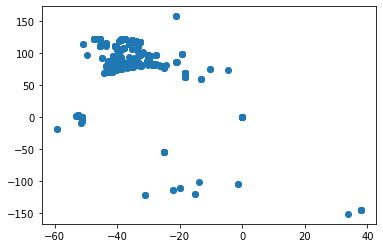

In [185]:
plt.scatter(-1*A,-1*B)

به صورت شهودی می‌توان حدس زد که این نقاط مختصات نقطه‌ای که هر توییت از آن ارسال شده را نشان می‌دهند. اما به نظر بهتر می‌آید از cluster شده‌ی آنها که در ستون دیگری موجود است استفاده کرد.

در ضمن تعداد آنها نیز خیلی کم است.

In [186]:
train_data.drop(columns=['tweet_coord'],inplace=True)

In [187]:
train_data.head(5)

,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
key,,,,,,,,,,,,
11429,3,2/25/15 3:07,positive,1.0,NaN,NaN,US Airways,0,@USAirways she also appreciated having her ver...,2/18/15 10:55,"Memphis, Tennessee",Central Time (US & Canada)
9717,3,2/25/15 3:20,negative,1.0,Can't Tell,0.3464,US Airways,0,@USAirways Just discovered that they billed us...,2/22/15 19:24,Southeastern Pennsylvania USA,NaN
10153,3,2/25/15 6:20,negative,1.0,Can't Tell,1.0000,US Airways,0,@USAirways u guys suck,2/22/15 7:28,NaN,NaN
975,3,2/25/15 2:14,negative,1.0,Can't Tell,1.0000,United,0,@united I will but right now I'm to angry,2/23/15 14:09,Punk is the preacher.,Arizona
1511,3,2/25/15 6:57,negative,1.0,Can't Tell,0.6848,United,0,@united not sure why the people in row 7 that ...,2/22/15 18:50,San Francisco,Pacific Time (US & Canada)


همچنین می‌توانیم نموداری از دلایل نارضایتی مردم از هواپیمایی‌هایی مختلف رسم کنیم.

In [188]:
def plot_negative_reasons(airline):
    df=train_data[train_data['airline']==airline]['negativereason'].value_counts()
    index = df.index
    value = df.values
    ax = sns.barplot(x=value,y=index)
    ax.set(xlabel="Count",ylabel="Negative Reason",title=f'Airline: {airline}')

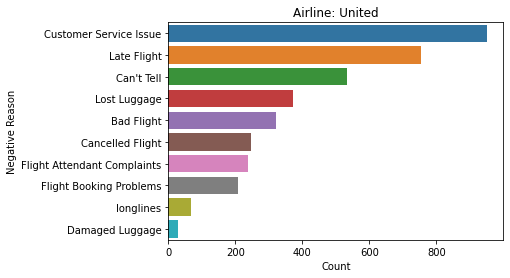

In [189]:
plot_negative_reasons('United')

# Text Preprocessing

In [190]:
tweets = train_data[['text']]
y = train_data['airline_sentiment']

In [191]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/nima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

در این قسمت
1. `stopword`ها را حذف می‌کنیم.
2. قسمت‌های غیر از کلمات مثل mentionها و یا آدرس‌های وب را حذف می‌کنیم.
3. کلمه‌ها را به ریشه‌های آنها `stem` می‌کنیم.
4. معیار `tf-idf` را برای کلمات مختلف حساب می‌کنیم.
5. کلمات را lowercase می‌کنیم.

ما به جای استفاده از آپشن‌های موجود در خود کلاس `Tf-idf Vectorizer` خودمان متن را پردازش می‌کنیم تا بسته به محتوی تغییراتی در روش پردازش ایجاد کنیم.
مثلا اینجا محتوی توییت است و باید منشن‌ها و لینک‌ها را از توییت حذف کرد.

In [262]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [193]:
class TextProcessor:
    
    def __init__(self,stopwords=None,):
        self.stopwords = set(stopwords)
        self.stemmer = SnowballStemmer("english")
        
    def tokenize(self,text):
        return word_tokenize(text.lower(),language="english")
    
    def remove_stopwords(self,sentence):
        filtered_sentence = []
        for word in sentence:
            if word not in self.stopwords and len(word) > 1 and '/' not in word and 'http' not in word and '@' not in word:
                filtered_sentence.append(word)
        return filtered_sentence
    
    def stem(self,sentence):
            return [self.stemmer.stem(word) for word in sentence]
        
    def remove_url(self , text):
        # remove urls from text
        text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)',
                      ' ',
                     text)
        # remove tweet mentions
        text = re.sub(r'(?!.*\bRT\b)(?:.+\s)?@\w+',' ',text)
        return text
    
    def process(self,text):
        return ' '.join(self.stem(self.remove_stopwords(self.tokenize(self.remove_url(text)))))

In [194]:
t = TextProcessor(stopwords=stopwords.words("english"))

tweets["processed"] = tweets["text"].apply(t.process)

<ipython-input-194-35816a925120>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["processed"] = tweets["text"].apply(t.process)


با استفاده از `TfidfVectorizer` معیار Tf-idf را برای همه‌ی کلمات (ریشه‌ی کلمات) برای همه‌ی توییت‌ها محاسبه می‌کنیم.

In [195]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tweets["processed"])

برای استفاده در تست `chi-square` متغیر جواب را به شماره encode می‌کنیم.

In [196]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [197]:
print(label_encoder.classes_)
print(y_encoded)

['negative' 'neutral' 'positive']
[2 0 0 ... 0 0 1]


# Chi-square Test
حالا با استفاده از تست Chi-square معتبر بودن هر کدام از این ریشه‌ی کلمات را برای کار دسته بندی خودمان می‌سنجیم تا تعداد آنها را محدود کنیم.

In [198]:
from sklearn.feature_selection import chi2,SelectKBest

In [199]:
chi_scores, p_values = chi2(X,y)

<AxesSubplot:xlabel='features', ylabel='P-values'>

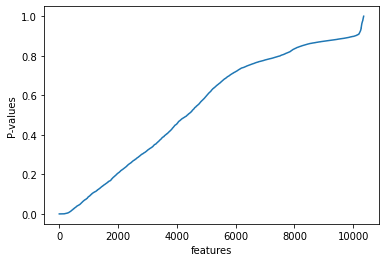

In [200]:
p_values.sort()
p_series = pd.Series(p_values)
p_series.plot(ylabel="P-values",xlabel="features")

طبق نمودار حدودا ۵۰۰ ویژگی را می‌توانیم جدا و برای مدل استفاده کنیم.

In [201]:
X_new = SelectKBest(chi2,k=500).fit_transform(X,y)

# Training Model
در مرحله‌ی اول فقط از ویژگی‌های بدست آمده از متن توییت استفاده می‌کنیم. در مراحل بعد به مرور ویژگی‌های دیگر را به آن اضافه خواهیم کرد. 

In [202]:
train_data.drop(columns=['_last_judgment_at'],inplace=True)
train_data.drop(columns=['tweet_created'],inplace=True)

In [203]:
final_data = train_data.drop(columns=['airline_sentiment','text'])

In [204]:
words_df= pd.DataFrame.sparse.from_spmatrix(X_new,index=final_data.index)

In [208]:
train_index = final_data.index.intersection(train_index)
validation_index = final_data.index.intersection(validation_index)
test_index = final_data.index.intersection(test_index)

In [223]:
train_final = final_data.loc[train_index]
validation_final = final_data.loc[validation_index]
test_final = final_data.loc[test_index]
train_words = scipy.sparse.csc_matrix(words_df.loc[train_index].values)
validation_words = scipy.sparse.csc_matrix(words_df.loc[validation_index].values)
test_words = scipy.sparse.csc_matrix(words_df.loc[test_index].values)

In [231]:
y_train = y[train_index]
y_validation = y[validation_index]
y_test = y[test_index]

## Multinomial Naive Bayes

In [232]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
multinomial_nb = MultinomialNB()

In [233]:
multinomial_nb.fit(train_words,y_train)

MultinomialNB()

In [235]:
# predicting using 500 features
y_predicted = multinomial_nb.predict(train_words)
print("Train Dataset:")
print(classification_report(y_true=y_train,y_pred=y_predicted))
y_predicted = multinomial_nb.predict(validation_words)
print("Validation Dataset:")
print(classification_report(y_true=y_validation,y_pred=y_predicted))

Train Dataset:
              precision    recall  f1-score   support

    negative       0.70      0.99      0.82      5515
     neutral       0.77      0.19      0.30      1786
    positive       0.91      0.31      0.46      1444

    accuracy                           0.71      8745
   macro avg       0.79      0.50      0.53      8745
weighted avg       0.75      0.71      0.65      8745

Validation Dataset:
              precision    recall  f1-score   support

    negative       0.69      0.99      0.81      7192
     neutral       0.76      0.19      0.31      2688
    positive       0.90      0.32      0.47      1788

    accuracy                           0.71     11668
   macro avg       0.78      0.50      0.53     11668
weighted avg       0.74      0.71      0.64     11668



In [110]:
multinomial_nb.fit(X,y)

MultinomialNB()

In [113]:
# predicting using about 8000 features
y_predicted = multinomial_nb.predict(X)
print(classification_report(y_true=y,y_pred=y_predicted))

              precision    recall  f1-score   support

    negative       0.71      1.00      0.83      5515
     neutral       0.91      0.24      0.38      1786
    positive       0.95      0.33      0.49      1444

    accuracy                           0.73      8745
   macro avg       0.86      0.52      0.56      8745
weighted avg       0.79      0.73      0.68      8745



می‌بینیم که با تغییر تعداد ویژگی‌ها از ۵۰۰ به ۸۰۰۰ تغییر عمده‌ای در دقت مدل رخ نداده پس استفاده از تست chi-square درست بوده است.

## SVC (Support Vector Classification)

In [114]:
from sklearn.svm import SVC

In [115]:
svc = SVC(kernel='rbf',probability=True,C=0.025)

In [237]:
svc.fit(train_words,y_train)

SVC(C=0.025, probability=True)

In [238]:
# using only 500 features
y_predicted = svc.predict(train_words)
print("Train Dataset:")
print(classification_report(y_true=y_train,y_pred=y_predicted))
y_predicted = svc.predict(validation_words)
print("Validation Dataset:")
print(classification_report(y_true=y_validation,y_pred=y_predicted))

Train Dataset:


/home/nima/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.64      1.00      0.78      5515
     neutral       0.00      0.00      0.00      1786
    positive       0.83      0.09      0.16      1444

    accuracy                           0.64      8745
   macro avg       0.49      0.36      0.31      8745
weighted avg       0.54      0.64      0.52      8745

Validation Dataset:
              precision    recall  f1-score   support

    negative       0.62      1.00      0.77      7192
     neutral       0.00      0.00      0.00      2688
    positive       0.71      0.06      0.11      1788

    accuracy                           0.62     11668
   macro avg       0.44      0.35      0.29     11668
weighted avg       0.49      0.62      0.49     11668



In [119]:
# using all features
svc.fit(X,y)

SVC(C=0.025, probability=True)

In [120]:
y_predicted = svc.predict(X)
print(classification_report(y_true=y,y_pred=y_predicted))

              precision    recall  f1-score   support

    negative       0.64      1.00      0.78      5515
     neutral       0.00      0.00      0.00      1786
    positive       0.87      0.06      0.11      1444

    accuracy                           0.64      8745
   macro avg       0.50      0.35      0.30      8745
weighted avg       0.55      0.64      0.51      8745



همچنین اینجا هم استفاده از تمام ویژگی‌های متنی توییت تغییر خاصی در دقت مدل نداد.

## KNN (K nearest neighbors)

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn_50 = KNeighborsClassifier(n_neighbors=50)
knn_3 = KNeighborsClassifier(n_neighbors=3)

اینجا حتی نیازی به امتحان کردن کل فیچرها نداریم چون curse of dimentionality حتما KNN را خراب می‌کند.

In [239]:
knn_50.fit(train_words,y_train)
knn_3.fit(train_words,y_train)

KNeighborsClassifier(n_neighbors=3)

In [240]:
print("KNN with 50 neighbors:")
print("Train Dataset:")
y_predicted = knn_50.predict(train_words)
print(classification_report(y_true=y_train,y_pred=y_predicted))
print("Validation Dataset:")
y_predicted = knn_50.predict(validation_words)
print(classification_report(y_true=y_validation,y_pred=y_predicted))

KNN with 50 neighbors:
Train Dataset:
              precision    recall  f1-score   support

    negative       0.74      0.89      0.81      5515
     neutral       0.48      0.42      0.45      1786
    positive       0.83      0.33      0.47      1444

    accuracy                           0.70      8745
   macro avg       0.68      0.55      0.58      8745
weighted avg       0.70      0.70      0.68      8745

Validation Dataset:
              precision    recall  f1-score   support

    negative       0.72      0.89      0.79      7192
     neutral       0.50      0.40      0.44      2688
    positive       0.76      0.28      0.41      1788

    accuracy                           0.68     11668
   macro avg       0.66      0.52      0.55     11668
weighted avg       0.68      0.68      0.65     11668



In [241]:
print("KNN with 3 neighbors:")
print("Train Dataset:")
y_predicted = knn_3.predict(train_words)
print(classification_report(y_true=y_train,y_pred=y_predicted))
print("Validation Dataset:")
y_predicted = knn_3.predict(validation_words)
print(classification_report(y_true=y_validation,y_pred=y_predicted))

KNN with 3 neighbors:
Train Dataset:
              precision    recall  f1-score   support

    negative       0.81      0.93      0.87      5515
     neutral       0.72      0.54      0.62      1786
    positive       0.85      0.60      0.70      1444

    accuracy                           0.80      8745
   macro avg       0.79      0.69      0.73      8745
weighted avg       0.80      0.80      0.79      8745

Validation Dataset:
              precision    recall  f1-score   support

    negative       0.72      0.84      0.78      7192
     neutral       0.46      0.39      0.42      2688
    positive       0.68      0.42      0.52      1788

    accuracy                           0.67     11668
   macro avg       0.62      0.55      0.57     11668
weighted avg       0.66      0.67      0.65     11668



## Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
random_forest = RandomForestClassifier(n_estimators=200)

In [242]:
random_forest.fit(train_words,y_train)

RandomForestClassifier(n_estimators=200)

In [243]:
print("Train Dataset:")
y_predicted = random_forest.predict(train_words)
print(classification_report(y_true=y_train,y_pred=y_predicted))
print("Validation Dataset:")
y_predicted = random_forest.predict(validation_words)
print(classification_report(y_true=y_validation,y_pred=y_predicted))

Train Dataset:
              precision    recall  f1-score   support

    negative       0.94      1.00      0.97      5515
     neutral       0.99      0.84      0.91      1786
    positive       0.99      0.94      0.97      1444

    accuracy                           0.96      8745
   macro avg       0.97      0.93      0.95      8745
weighted avg       0.96      0.96      0.96      8745

Validation Dataset:
              precision    recall  f1-score   support

    negative       0.75      0.90      0.82      7192
     neutral       0.60      0.37      0.46      2688
    positive       0.65      0.52      0.57      1788

    accuracy                           0.72     11668
   macro avg       0.67      0.60      0.62     11668
weighted avg       0.70      0.72      0.70     11668



Random forest تا اینجا عملکرد خیلی خوبی داشته است اما احتمالا روی داده‌های آموزشی overfit شده است.
باید عملکرد آن را روی داده‌های validation ببینیم.

 ## Gradient Boosting Machine

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

In [132]:
gbc = GradientBoostingClassifier(n_estimators=200)

In [244]:
gbc.fit(train_words,y_train)

GradientBoostingClassifier(n_estimators=200)

In [245]:
print("Train Dataset:")
y_predicted = gbc.predict(train_words)
print(classification_report(y_true=y_train,y_pred=y_predicted))
print("Validation Dataset:")
y_predicted = gbc.predict(validation_words)
print(classification_report(y_true=y_validation,y_pred=y_predicted))

Train Dataset:
              precision    recall  f1-score   support

    negative       0.76      0.97      0.86      5515
     neutral       0.92      0.28      0.43      1786
    positive       0.81      0.65      0.72      1444

    accuracy                           0.78      8745
   macro avg       0.83      0.64      0.67      8745
weighted avg       0.80      0.78      0.75      8745

Validation Dataset:
              precision    recall  f1-score   support

    negative       0.72      0.96      0.82      7192
     neutral       0.73      0.19      0.30      2688
    positive       0.71      0.54      0.61      1788

    accuracy                           0.72     11668
   macro avg       0.72      0.56      0.58     11668
weighted avg       0.72      0.72      0.67     11668



In [135]:
#using all features
gbc.fit(X,y)

GradientBoostingClassifier(n_estimators=200)

In [137]:
y_predicted = gbc.predict(X)
print(classification_report(y_true=y,y_pred=y_predicted))

              precision    recall  f1-score   support

    negative       0.76      0.98      0.86      5515
     neutral       0.92      0.27      0.42      1786
    positive       0.83      0.65      0.72      1444

    accuracy                           0.78      8745
   macro avg       0.83      0.63      0.67      8745
weighted avg       0.80      0.78      0.74      8745



## XGBoost

In [140]:
from xgboost import XGBClassifier

In [141]:
xgb = XGBClassifier()

In [246]:
xgb.fit(train_words,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [247]:
print("Train Data:")
y_predicted = xgb.predict(train_words)
print(classification_report(y_true=y_train,y_pred=y_predicted))
print("Validation Data:")
y_predicted = xgb.predict(validation_words)
print(classification_report(y_true=y_validation,y_pred=y_predicted))

Train Data:
              precision    recall  f1-score   support

    negative       0.81      0.98      0.88      5515
     neutral       0.90      0.42      0.58      1786
    positive       0.86      0.73      0.79      1444

    accuracy                           0.82      8745
   macro avg       0.86      0.71      0.75      8745
weighted avg       0.83      0.82      0.81      8745

Validation Data:
              precision    recall  f1-score   support

    negative       0.74      0.94      0.83      7192
     neutral       0.69      0.28      0.40      2688
    positive       0.71      0.57      0.64      1788

    accuracy                           0.73     11668
   macro avg       0.72      0.60      0.62     11668
weighted avg       0.73      0.73      0.70     11668



## Adding extra features
الان تعدادی از فیچرهای غیر از متن را در پیشبینی دخیل می‌کنیم. تا به حال gradient boosting machine بیشترین دقت را داشته است. پس در ادامه‌ی کار فقط آن را ادامه می‌دهیم.

In [254]:
train_new = pd.concat([train_final,words_df.loc[train_index]],axis=1)
train_new.drop(columns=['airline_sentiment:confidence'],inplace=True)
train_new.drop(columns=['negativereason:confidence'],inplace=True)
train_new.drop(columns=['negativereason'],inplace=True)

ابتدا ویژگی‌های گسسته را با استفاده از OnehotEncoder تغییر می‌دهیم.

In [271]:
enc = OneHotEncoder()
airline_transformed = enc.fit_transform(train_new[['airline']])

In [275]:
train_new.drop(columns=['airline','user_timezone','tweet_location'],inplace=True)

In [279]:
airline_transformed = pd.DataFrame.sparse.from_spmatrix(airline_transformed,index=train_new.index)
train_new= pd.concat([train_new,airline_transformed],axis=1)

In [283]:
gbc.fit(train_new.values,y_train)

GradientBoostingClassifier(n_estimators=200)

In [284]:
print("Train Dataset:")
y_predicted = gbc.predict(train_new)
print(classification_report(y_true=y_train,y_pred=y_predicted))

Train Dataset:


/home/nima/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.80      0.96      0.87      5515
     neutral       0.76      0.40      0.52      1786
    positive       0.82      0.66      0.73      1444

    accuracy                           0.80      8745
   macro avg       0.79      0.67      0.71      8745
weighted avg       0.79      0.80      0.78      8745



خب دقت روی داده‌های آموزشی تا حدی بهبود پیدا کرد
پس پروسس‌های اضافه را روی داده‌های validation نیز انجام می‌دهیم.

In [286]:
validation_new = pd.concat([validation_final,words_df.loc[validation_index]],axis=1)
validation_new.drop(columns=['airline_sentiment:confidence'],inplace=True)
validation_new.drop(columns=['negativereason:confidence'],inplace=True)
validation_new.drop(columns=['negativereason'],inplace=True)

In [287]:
enc = OneHotEncoder()
airline_transformed = enc.fit_transform(validation_new[['airline']])

In [288]:
validation_new.drop(columns=['airline','user_timezone','tweet_location'],inplace=True)

In [289]:
airline_transformed = pd.DataFrame.sparse.from_spmatrix(airline_transformed,index=validation_new.index)
validation_new= pd.concat([validation_new,airline_transformed],axis=1)

In [290]:
print("Validation Dataset:")
y_predicted = gbc.predict(validation_new)
print(classification_report(y_true=y_validation,y_pred=y_predicted))

Validation Dataset:


/home/nima/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.74      0.94      0.83      7192
     neutral       0.63      0.29      0.40      2688
    positive       0.72      0.55      0.62      1788

    accuracy                           0.73     11668
   macro avg       0.70      0.59      0.62     11668
weighted avg       0.71      0.73      0.70     11668



هورااا. دقت روی داده‌های validation هم کمی بهبود پیدا کرد

به نظر می‌آید می‌توانیم این مدل تا به حال بهترین کارکرد را داشته است.

چند قدم دیگر می‌توانیم در ادامه انجام دهیم:
- missing values را برای ستون‌های موقعیت مکانی و timezone پر کنیم و آنها را نیز در آموزش مدل دخیل کنیم.
- با chi-square بسنجیم که آیا زمان ارسال توییت بدرد می‌خورد یا اینکه آن را به چند دسته تقسیم کنیم و در مدل استفاده کنیم.
- از یک مدل شبکه عصبی برای تحیلی نوشته‌ها استفاده کنیم.
- text precprocessing بیشتری انجام دهیم و از روش‌های دیگر برای آن استفاده کنیم.